# Bankrupty_Prevenstion_System

__Problem Statement :__

Business Objective :
This is a classification project, since the variable to predict is binary (bankruptcy or non-bankruptcy). The goal here is to model the probability that a business goes bankrupt from different features.


In [1]:
#importing required libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')


In [2]:
#read the dataset
dataframe = pd.read_csv("bankruptcy-prevention.csv")
dataframe

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


The data file contains 7 features about 250 companies.

The data set includes the following variables:
industrial_risk: 0=low risk, 0.5=medium risk, 1=high risk.
management_risk: 0=low risk, 0.5=medium risk, 1=high risk.
financial flexibility: 0=low flexibility, 0.5=medium flexibility, 1=high flexibility.
credibility: 0=low credibility, 0.5=medium credibility, 1=high credibility.
competitiveness: 0=low competitiveness, 0.5=medium competitiveness, 1=high competitiveness.
operating_risk: 0=low risk, 0.5=medium risk, 1=high risk.
class: bankruptcy, non-bankruptcy (target variable).


In [3]:
df = dataframe.copy()

In [4]:
df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.shape

(250, 7)

In [7]:
df.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [8]:
df.dtypes

industrial_risk          float64
management_risk          float64
financial_flexibility    float64
credibility              float64
competitiveness          float64
operating_risk           float64
class                     object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [10]:
df.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### checking is there any missing values are there in data or not

In [11]:
df.isnull().sum()

industrial_risk          0
management_risk          0
financial_flexibility    0
credibility              0
competitiveness          0
operating_risk           0
class                    0
dtype: int64

<AxesSubplot:>

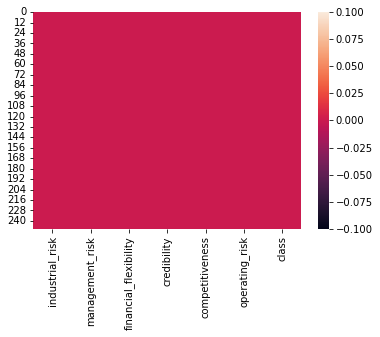

In [12]:
sns.heatmap(df.isnull())

In [13]:
#another way to finding out the count of null values using list comprehension
[features for features in df.columns if df[features].isnull().sum( ) > 0]

[]

### here we are changing the target variable to 'bankruptcy' = 0 and 'non bankruptcy' = 1

In [14]:
df['class'] = df['class'].map({'bankruptcy':0 , 'non-bankruptcy':1})
df['class']

0      0
1      0
2      0
3      0
4      0
      ..
245    1
246    1
247    1
248    1
249    1
Name: class, Length: 250, dtype: int64

In [15]:
new_df = df.merge(df['class'],how = 'right')
new_df

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
31893,0.0,1.0,1.0,1.0,1.0,1.0,1
31894,1.0,1.0,0.5,1.0,1.0,0.0,1
31895,0.0,1.0,1.0,0.5,0.5,0.0,1
31896,1.0,0.0,0.5,1.0,0.5,0.0,1


In [16]:
for col in df.columns :
    print('{} : {}' .format(col ,df[col].unique()))

industrial_risk : [0.5 0.  1. ]
management_risk : [1.  0.  0.5]
financial_flexibility : [0.  0.5 1. ]
credibility : [0.  0.5 1. ]
competitiveness : [0.  0.5 1. ]
operating_risk : [0.5 1.  0. ]
class : [0 1]


## Exploratory Data Analysis

In [17]:
new_df.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
industrial_risk,1.000000,0.260946,-0.159335,-0.006995,-0.249126,0.171495,-0.221911
management_risk,0.260946,1.000000,-0.233758,-0.291439,-0.288281,0.233927,-0.356826
financial_flexibility,-0.159335,-0.233758,1.000000,0.488593,0.656315,-0.091443,0.726181
credibility,-0.006995,-0.291439,0.488593,1.000000,0.653020,-0.279359,0.741044
competitiveness,-0.249126,-0.288281,0.656315,0.653020,1.000000,-0.190921,0.885921
operating_risk,0.171495,0.233927,-0.091443,-0.279359,-0.190921,1.000000,-0.269834
class,-0.221911,-0.356826,0.726181,0.741044,0.885921,-0.269834,1.000000


<AxesSubplot:>

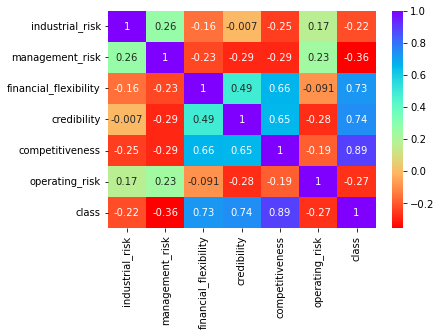

In [18]:
sns.heatmap(new_df.corr() , annot = True , cmap = 'rainbow_r')

<AxesSubplot:xlabel='class', ylabel='count'>

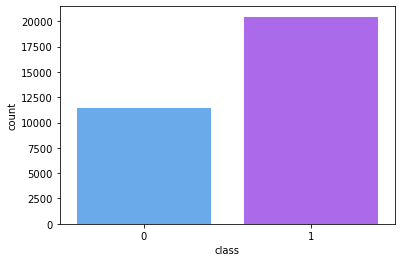

In [19]:
sns.countplot(x = 'class' , data = new_df  , palette = 'cool')

<AxesSubplot:xlabel='financial_flexibility', ylabel='count'>

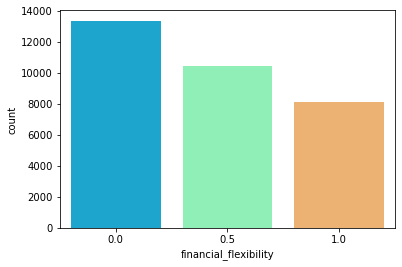

In [20]:
sns.countplot(x = 'financial_flexibility' , data = new_df  , palette = 'rainbow')

<AxesSubplot:xlabel='class'>

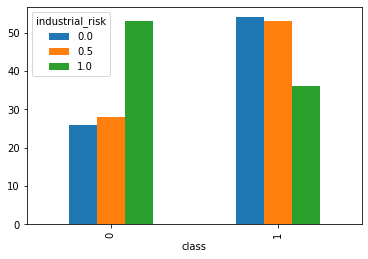

In [21]:
# for visualization 
pd.crosstab(df['class'] , df['industrial_risk']).plot(kind = 'bar')

<AxesSubplot:xlabel='class'>

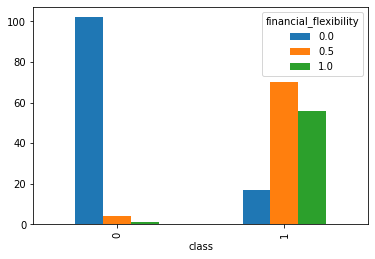

In [22]:
pd.crosstab(df['class'] , df['financial_flexibility']).plot(kind = 'bar')

## Data Visualization

<AxesSubplot:xlabel='industrial_risk'>

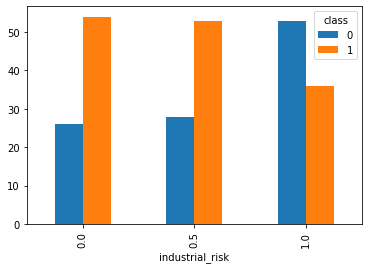

In [23]:
pd.crosstab( df['industrial_risk'] , df['class']).plot(kind = 'bar')

<AxesSubplot:xlabel='financial_flexibility'>

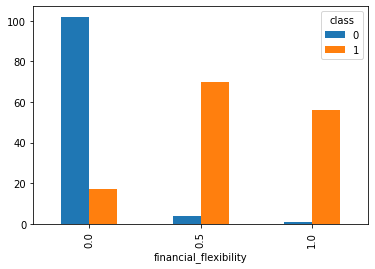

In [24]:
pd.crosstab( df['financial_flexibility'] , df['class']).plot(kind = 'bar')

In [25]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p = pct,v = val)
    return my_autopct

<AxesSubplot:xlabel='class', ylabel='count'>

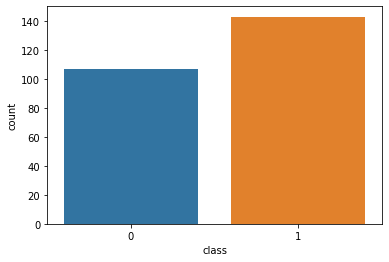

In [26]:
#  bar plot of class 
sns.countplot(df['class'])

In [27]:
class_count = df['class'].value_counts()
class_count

1    143
0    107
Name: class, dtype: int64

1 is for non-bankruptcy and 0 is for bankruptcy

In [28]:
class_per = make_autopct(list(class_count.values))
class_per

<function __main__.make_autopct.<locals>.my_autopct(pct)>

([<matplotlib.patches.Wedge at 0x28a1f7bf0d0>,
 [Text(-0.24669792697222737, 1.0719795393698546, 'non-bankruptcy'),
  Text(0.24669802733819424, -1.0719795162723231, 'bankruptcy')],
 [Text(-0.1345625056212149, 0.584716112383557, '57.20%  (143)'),
  Text(0.13456256036628775, -0.5847160997849035, '42.80%  (107)')])

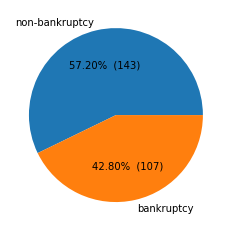

In [29]:
# Pie-chart for class

labels_list = ['non-bankruptcy','bankruptcy'] 
plt.pie(class_count , labels = labels_list , autopct = class_per)

<AxesSubplot:xlabel='industrial_risk', ylabel='count'>

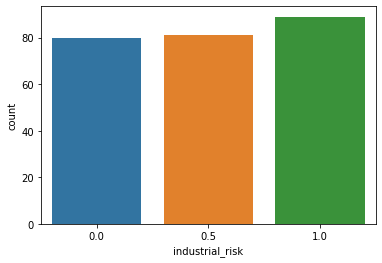

In [30]:
# Barplot for industrial risk

sns.countplot(df['industrial_risk'])

In [31]:
industrial_risk_count = df['industrial_risk'].value_counts()
industrial_risk_count

1.0    89
0.5    81
0.0    80
Name: industrial_risk, dtype: int64

In [32]:
industrial_risk_per = make_autopct(list(industrial_risk_count.values))
industrial_risk_per

<function __main__.make_autopct.<locals>.my_autopct(pct)>

([<matplotlib.patches.Wedge at 0x28a1f85cd00>,
 [Text(0.480827324049145, 0.9893457860868153, 'High_Risk'),
  Text(-1.0929724363648976, -0.12414206920532618, 'Medium_Risk'),
  Text(0.5894094953465407, -0.9287607048079373, 'Low_Risk')],
 [Text(0.26226944948135184, 0.5396431560473538, '35.60%  (89)'),
  Text(-0.5961667834717623, -0.06771385593017791, '32.40%  (81)'),
  Text(0.32149608837084037, -0.5065967480770566, '32.00%  (80)')])

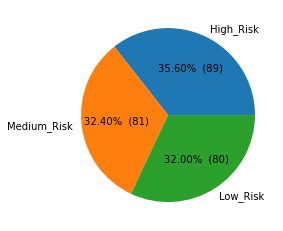

In [33]:
# Pie-chart for industrial risk

labels_list = ['High_Risk','Medium_Risk','Low_Risk']
plt.pie(industrial_risk_count , labels = labels_list , autopct = industrial_risk_per)

<AxesSubplot:xlabel='management_risk', ylabel='count'>

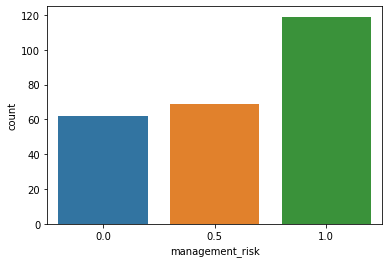

In [34]:
# bar plot of management risk

sns.countplot(df['management_risk'])

In [35]:
management_risk_count = df['management_risk'].value_counts()
management_risk_count

1.0    119
0.5     69
0.0     62
Name: management_risk, dtype: int64

In [36]:
management_risk_per = make_autopct(list(management_risk_count.values))
management_risk_per

<function __main__.make_autopct.<locals>.my_autopct(pct)>

([<matplotlib.patches.Wedge at 0x28a1f90db20>,
 [Text(0.08285944828829286, 1.096874793141569, 'High_Risk'),
  Text(-0.8296764847285306, -0.7222443704789318, 'Medium_Risk'),
  Text(0.7826892547719247, -0.7729149568125651, 'Low_Risk')],
 [Text(0.045196062702705195, 0.598295341713583, '47.60%  (119)'),
  Text(-0.45255080985192575, -0.39395147480669, '27.60%  (69)'),
  Text(0.42692141169377706, -0.4215899764432173, '24.80%  (62)')])

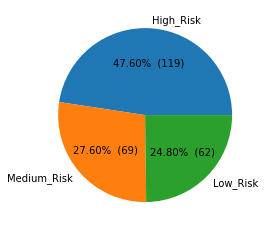

In [37]:
# Pie-chart for management risk

labels_list = ['High_Risk','Medium_Risk','Low_Risk']
plt.pie(management_risk_count , labels = labels_list , autopct = management_risk_per)

<AxesSubplot:xlabel='financial_flexibility', ylabel='count'>

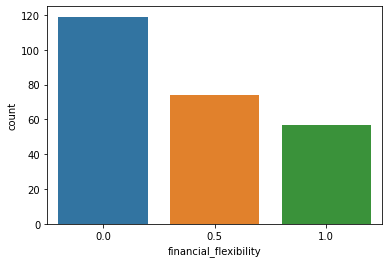

In [38]:
#  bar plot of financial_flexibility

sns.countplot(df['financial_flexibility'])

In [39]:
financial_flexibility_count = df['financial_flexibility'].value_counts()
financial_flexibility_count

0.0    119
0.5     74
1.0     57
Name: financial_flexibility, dtype: int64

In [40]:
financial_flexibility_per = make_autopct(list(financial_flexibility_count.values))
financial_flexibility_per

<function __main__.make_autopct.<locals>.my_autopct(pct)>

([<matplotlib.patches.Wedge at 0x28a1f9c48e0>,
 [Text(0.08285944828829286, 1.096874793141569, 'High_flexibility'),
  Text(-0.7826891824064006, -0.7729150300932182, 'Medium_flexibility'),
  Text(0.8296765861606192, -0.7222442539590475, 'Low_flexibility')],
 [Text(0.045196062702705195, 0.598295341713583, '47.60%  (119)'),
  Text(-0.42692137222167303, -0.42159001641448257, '29.60%  (74)'),
  Text(0.4525508651785195, -0.39395141125038946, '22.80%  (57)')])

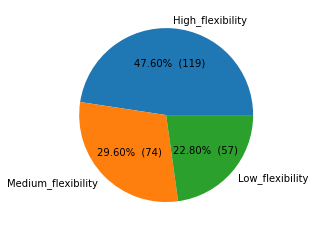

In [41]:
# Pie-chart for financial flexibility

labels_list = ['High_flexibility','Medium_flexibility','Low_flexibility']
plt.pie(financial_flexibility_count , labels = labels_list , autopct = financial_flexibility_per)

<AxesSubplot:xlabel='credibility', ylabel='count'>

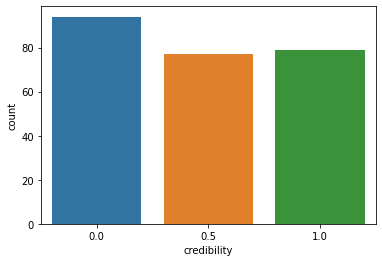

In [42]:
# bar plot of credibility 

sns.countplot(df['credibility'])

In [43]:
credibility_count = df['credibility'].value_counts()
credibility_count

0.0    94
1.0    79
0.5    77
Name: credibility, dtype: int64

In [44]:
credibility_per = make_autopct(list(credibility_count.values))
credibility_per

<function __main__.make_autopct.<locals>.my_autopct(pct)>

([<matplotlib.patches.Wedge at 0x28a1fa6ab50>,
 [Text(0.41775704623199333, 1.0175849106209862, 'High_credibility'),
  Text(-1.0749949441347812, -0.23320778307050272, 'Medium_credibility'),
  Text(0.6239958487890805, -0.9058858541195989, 'Low_credibility')],
 [Text(0.22786747976290542, 0.5550463148841742, '37.60%  (94)'),
  Text(-0.5863608786189716, -0.1272042453111833, '31.60%  (79)'),
  Text(0.34036137206677114, -0.4941195567925084, '30.80%  (77)')])

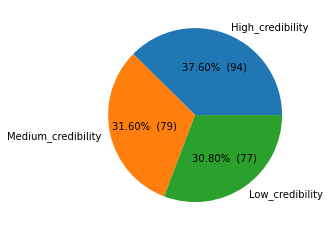

In [45]:
# Pie-chart for credibility

labels_list = ['High_credibility','Medium_credibility','Low_credibility'] 
plt.pie(credibility_count , labels = labels_list , autopct = credibility_per)

<AxesSubplot:xlabel='competitiveness', ylabel='count'>

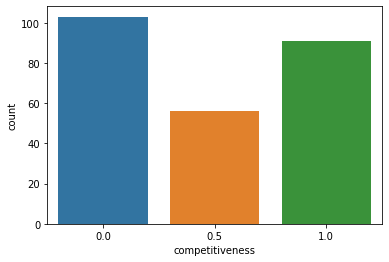

In [46]:
#  bar plot of competitiveness

sns.countplot(df['competitiveness'])

In [47]:
competitiveness_count = df['competitiveness'].value_counts()
competitiveness_count

0.0    103
1.0     91
0.5     56
Name: competitiveness, dtype: int64

In [48]:
competitiveness_per = make_autopct(list(competitiveness_count.values))
competitiveness_per

<function __main__.make_autopct.<locals>.my_autopct(pct)>

([<matplotlib.patches.Wedge at 0x28a1fb22340>,
 [Text(0.30024712748379895, 1.0582304391944732, 'High_competitive'),
  Text(-0.9136555015034916, -0.6125631596598047, 'Medium_competetive'),
  Text(0.8386867466521296, -0.7117615759438458, 'Low_competative')],
 [Text(0.1637711604457085, 0.5772166031969853, '41.20%  (103)'),
  Text(-0.49835754627463175, -0.3341253598144389, '36.40%  (91)'),
  Text(0.4574654981738888, -0.3882335868784613, '22.40%  (56)')])

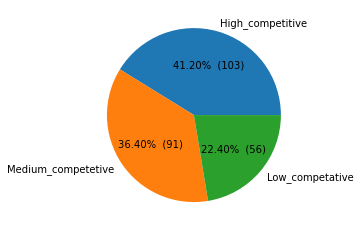

In [49]:
# Pie-chart for competitivenss

labels_list = ['High_competitive','Medium_competetive','Low_competative'] 
plt.pie(competitiveness_count , labels = labels_list , autopct = competitiveness_per)

<AxesSubplot:xlabel='operating_risk', ylabel='count'>

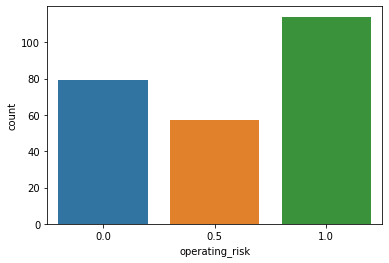

In [50]:
#  bar plot of operating risk

sns.countplot(df['operating_risk'])

In [51]:
operating_risk_count = df['operating_risk'].value_counts()
operating_risk_count

1.0    114
0.0     79
0.5     57
Name: operating_risk, dtype: int64

In [52]:
operating_risk_per = make_autopct(list(operating_risk_count.values))
operating_risk_per

<function __main__.make_autopct.<locals>.my_autopct(pct)>

([<matplotlib.patches.Wedge at 0x28a1fbcab20>,
 [Text(0.15156931893704537, 1.0895075683798439, 'High_risk'),
  Text(-0.8296764847285306, -0.7222443704789318, 'Medium_risk'),
  Text(0.8296765861606192, -0.7222442539590475, 'Low_risk')],
 [Text(0.08267417396566111, 0.5942768554799148, '45.60%  (114)'),
  Text(-0.45255080985192575, -0.39395147480669, '31.60%  (79)'),
  Text(0.4525508651785195, -0.39395141125038946, '22.80%  (57)')])

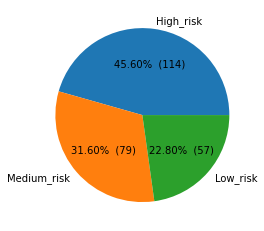

In [53]:
# Pie-chart for operating risk

labels_list = ['High_risk','Medium_risk','Low_risk'] 
plt.pie(operating_risk_count , labels = labels_list , autopct = operating_risk_per)

## Model Building

In [54]:
## split the dataset into independent and dependent features.
x = df.iloc[ :, :-1]
y = df.iloc[: , -1]

In [55]:
# independent features
x

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
0,0.5,1.0,0.0,0.0,0.0,0.5
1,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,1.0
3,0.5,0.0,0.0,0.5,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0
246,1.0,1.0,0.5,1.0,1.0,0.0
247,0.0,1.0,1.0,0.5,0.5,0.0
248,1.0,0.0,0.5,1.0,0.5,0.0


In [56]:
# Depedent feature
y

0      0
1      0
2      0
3      0
4      0
      ..
245    1
246    1
247    1
248    1
249    1
Name: class, Length: 250, dtype: int64

In [57]:
# Train - Test split
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y ,
                                   random_state = 42, 
                                   test_size = 0.3)
#here we split our whole dataset in 70% - 30% split. 

In [58]:
x_train

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
82,0.0,1.0,0.0,0.0,0.0,1.0
29,0.0,0.5,0.0,0.0,0.0,1.0
126,0.5,0.5,0.5,1.0,1.0,0.5
79,0.0,0.5,0.0,0.0,0.0,0.5
86,0.5,0.5,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
106,0.0,1.0,0.0,0.0,0.5,0.5
14,0.0,1.0,0.0,0.0,0.5,0.5
92,0.5,1.0,0.0,0.0,0.0,0.5
179,0.0,0.5,1.0,0.5,1.0,0.0


In [59]:
y_train

82     0
29     0
126    1
79     0
86     0
      ..
106    0
14     0
92     0
179    1
102    0
Name: class, Length: 175, dtype: int64

In [60]:
x_test

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
142,0.0,1.0,1.0,1.0,0.5,1.0
6,1.0,1.0,0.0,0.0,0.0,0.0
97,1.0,1.0,0.0,0.5,0.0,0.5
60,0.0,1.0,0.0,0.0,0.0,0.0
112,0.5,0.5,1.0,1.0,1.0,0.5
...,...,...,...,...,...,...
73,0.0,1.0,0.0,0.0,0.0,1.0
158,0.5,1.0,0.5,0.5,1.0,0.0
115,0.0,0.0,0.5,1.0,0.5,0.0
75,1.0,1.0,0.0,0.0,0.0,0.5


In [61]:
y_test

142    1
6      0
97     0
60     0
112    1
      ..
73     0
158    1
115    1
75     0
237    1
Name: class, Length: 75, dtype: int64

### 1) Logistic Regression 

In [62]:
accscore = [] 
model_name = []

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()

In [63]:
model1 = lr.fit(x_train , y_train)
model1

LogisticRegression()

In [64]:
lr_pred = lr.predict(x_test)
lr_pred

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [65]:
lr_acc = accuracy_score(y_test ,lr_pred)*100
lr_acc

100.0

In [66]:
# Cross validating the model
lr_scores = cross_val_score(lr, x, y, cv = 5) 
lr_scores

array([1.  , 1.  , 1.  , 0.98, 1.  ])

In [67]:
# mean of accuracy scores of Logistic Regression 
mean_lr = lr_scores.mean()*100
mean_lr

99.60000000000001

In [68]:
print("Accuracy Score of Logistic Regression model is", accuracy_score(y_test, lr_pred)*100)
print(f"\nAccuracy score of each cross validation cycle : ",lr_scores)
print(f"\nMean of accuracy score for Logistic Regression is {lr_scores.mean()*100}\n")

Accuracy Score of Logistic Regression model is 100.0

Accuracy score of each cross validation cycle :  [1.   1.   1.   0.98 1.  ]

Mean of accuracy score for Logistic Regression is 99.60000000000001



In [69]:
score = accuracy_score(y_test , lr_pred)
accscore.append(score)
model_name.append("lr")

In [70]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        50

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



In [71]:
confusion_matrix(y_test, lr_pred)

array([[25,  0],
       [ 0, 50]], dtype=int64)

### 2) Decision Tree Classifier

In [72]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()

In [73]:
model2 = DTC.fit(x_train, y_train)
model2

DecisionTreeClassifier()

In [74]:
DTC_pred = DTC.predict(x_test)
DTC_pred

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [75]:
DTC_acc = accuracy_score(y_test ,DTC_pred)*100
DTC_acc

98.66666666666667

In [76]:
# Cross validating the model
DTC_scores = cross_val_score(DTC, x, y, cv = 5) 
DTC_scores

array([1.  , 1.  , 1.  , 0.96, 1.  ])

In [77]:
# mean of accuracy scores of Decision tree classifier
mean_DTC = DTC_scores.mean()*100
mean_DTC 

99.2

In [78]:
print("Accuracy Score of Decision Tree Classifier is", accuracy_score(y_test, DTC_pred)*100)
print(f"\nAccuracy score of each cross validation cycle : ",DTC_scores)
print(f"\nMean of accuracy score for Decision Tree Classifier is {DTC_scores.mean()*100}\n")

Accuracy Score of Decision Tree Classifier is 98.66666666666667

Accuracy score of each cross validation cycle :  [1.   1.   1.   0.96 1.  ]

Mean of accuracy score for Decision Tree Classifier is 99.2



In [79]:
score = accuracy_score(y_test , DTC_pred)
accscore.append(score)
model_name.append("DTC")

In [80]:
print(classification_report(y_test, DTC_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.98      0.99        50

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



In [81]:
confusion_matrix(y_test, DTC_pred)

array([[25,  0],
       [ 1, 49]], dtype=int64)

### 3) KNN 

In [82]:
from sklearn.neighbors import KNeighborsClassifier
KNN =  KNeighborsClassifier()

In [83]:
model3 = KNN.fit(x_train, y_train)
model3

KNeighborsClassifier()

In [84]:
KNN_pred = KNN.predict(x_test)
KNN_pred

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [85]:
KNN_acc = accuracy_score(y_test ,KNN_pred)*100
KNN_acc

98.66666666666667

In [86]:
# Cross validating the model
KNN_scores = cross_val_score(KNN, x, y, cv = 5) 
KNN_scores

array([1.  , 1.  , 1.  , 0.98, 1.  ])

In [87]:
# mean of accuracy scores of K Neighbour Classifier
mean_KNN = KNN_scores.mean()*100
mean_KNN 

99.60000000000001

In [88]:
print("Accuracy Score of K Neighbours Classifier is", accuracy_score(y_test, KNN_pred)*100)
print(f"\nAccuracy score of each cross validation cycle : ",KNN_scores)
print(f"\nMean of accuracy score for K Neighbours Classifier is {KNN_scores.mean()*100}\n")

Accuracy Score of K Neighbours Classifier is 98.66666666666667

Accuracy score of each cross validation cycle :  [1.   1.   1.   0.98 1.  ]

Mean of accuracy score for K Neighbours Classifier is 99.60000000000001



In [89]:
score =accuracy_score(y_test , KNN_pred)
accscore.append(score)
model_name.append("KNN")

In [90]:
print(classification_report(y_test, KNN_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.98      0.99        50

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



In [91]:
confusion_matrix(y_test, KNN_pred)

array([[25,  0],
       [ 1, 49]], dtype=int64)

### 4) Support Vector Classifier 

In [92]:
from sklearn.svm import SVC
svc = SVC()

In [93]:
model4 = svc.fit(x_train, y_train)
model4

SVC()

In [94]:
svc_pred = svc.predict(x_test)
svc_pred

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [95]:
svc_acc = accuracy_score(y_test ,svc_pred)*100
svc_acc

100.0

In [96]:
# Cross validating the model
svc_scores = cross_val_score(svc, x, y, cv = 5) 
svc_scores

array([1.  , 1.  , 1.  , 0.98, 1.  ])

In [97]:
#mean of accuracy scores of Support Vector Classifier 
mean_svc = svc_scores.mean()*100
mean_svc 

99.60000000000001

In [98]:
print("Accuracy Score of Support Vector Classifier is", accuracy_score(y_test, svc_pred)*100)
print(f"\nAccuracy score of each cross validation cycle : ",svc_scores)
print(f"\nMean of accuracy score for Support Vector Classifier is {svc_scores.mean()*100}\n")

Accuracy Score of Support Vector Classifier is 100.0

Accuracy score of each cross validation cycle :  [1.   1.   1.   0.98 1.  ]

Mean of accuracy score for Support Vector Classifier is 99.60000000000001



In [99]:
score = accuracy_score(y_test , svc_pred)
accscore.append(score)
model_name.append("svc")

In [100]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        50

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



In [101]:
confusion_matrix(y_test, svc_pred)

array([[25,  0],
       [ 0, 50]], dtype=int64)

### 5) Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()

In [103]:
model5 = RFC.fit(x_train ,y_train)
model5

RandomForestClassifier()

In [104]:
RFC_pred = RFC.predict(x_test)
RFC_pred

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [105]:
RFC_acc = accuracy_score(y_test , RFC_pred)
RFC_acc

0.9866666666666667

In [106]:
# Cross validating the model
RFC_scores = cross_val_score(RFC, x, y, cv = 5) 
RFC_scores

array([1.  , 1.  , 1.  , 0.98, 1.  ])

In [107]:
# mean of accuracy scores of Random Forest Classifier. 
mean_RFC = RFC_scores.mean()*100
mean_RFC 

99.60000000000001

In [108]:
print("Accuracy Score of Random Forest Classifier is", accuracy_score(y_test, RFC_pred)*100)
print(f"\nAccuracy score of each cross validation cycle : ",RFC_scores)
print(f"\nMean of accuracy score for Random Forest Classifier is {RFC_scores.mean()*100}\n")

Accuracy Score of Random Forest Classifier is 98.66666666666667

Accuracy score of each cross validation cycle :  [1.   1.   1.   0.98 1.  ]

Mean of accuracy score for Random Forest Classifier is 99.60000000000001



In [109]:
score = accuracy_score(y_test , RFC_pred)
accscore.append(score)
model_name.append("RFC")

In [110]:
print(classification_report(y_test, RFC_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.98      0.99        50

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



In [111]:
confusion_matrix(y_test, RFC_pred)

array([[25,  0],
       [ 1, 49]], dtype=int64)

### 6) Gaussian NB

In [112]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [113]:
model6 = gnb.fit(x_train ,y_train)
model6

GaussianNB()

In [114]:
gnb_pred = gnb.predict(x_test)
gnb_pred

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [115]:
gnb_acc = accuracy_score(y_test , gnb_pred)
gnb_acc

1.0

In [116]:
# Cross validating the model
gnb_scores = cross_val_score(gnb, x, y, cv = 5) 
gnb_scores

array([0.98, 0.98, 0.96, 0.96, 0.98])

In [117]:
# mean of accuracy scores of Random Forest Classifier. 
mean_gnb = gnb_scores.mean()*100
mean_gnb

97.19999999999999

In [118]:
print("Accuracy Score of Gaussian NB is", accuracy_score(y_test, gnb_pred)*100)
print(f"\nAccuracy score of each cross validation cycle : ",gnb_scores)
print(f"\nMean of accuracy score for Gaussian NB is {gnb_scores.mean()*100}\n")

Accuracy Score of Gaussian NB is 100.0

Accuracy score of each cross validation cycle :  [0.98 0.98 0.96 0.96 0.98]

Mean of accuracy score for Gaussian NB is 97.19999999999999



In [119]:
score = accuracy_score(y_test , gnb_pred)
accscore.append(score)
model_name.append("gnb")

In [120]:
print(classification_report(y_test, gnb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        50

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



In [121]:
confusion_matrix(y_test, gnb_pred)

array([[25,  0],
       [ 0, 50]], dtype=int64)

### 7) Multinominal NB

In [122]:
from sklearn.naive_bayes import MultinomialNB
mnb  = MultinomialNB()

In [123]:
model7 = mnb.fit(x_train ,y_train)
model7

MultinomialNB()

In [124]:
mnb_pred = mnb.predict(x_test)
mnb_pred

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [125]:
mnb_acc = accuracy_score(y_test , mnb_pred)
mnb_acc

1.0

In [126]:
# Cross validating the model
mnb_scores = cross_val_score(mnb, x, y, cv = 5) 
mnb_scores

array([0.98, 0.98, 0.96, 0.98, 0.98])

In [127]:
# mean of accuracy scores of Random Forest Classifier. 
mean_mnb = mnb_scores.mean()*100
mean_mnb

97.6

In [128]:
print("Accuracy Score of Multinomial NB is", accuracy_score(y_test, mnb_pred)*100)
print(f"\nAccuracy score of each cross validation cycle : ",mnb_scores)
print(f"\nMean of accuracy score for Multinomial NB is {mnb_scores.mean()*100}\n")

Accuracy Score of Multinomial NB is 100.0

Accuracy score of each cross validation cycle :  [0.98 0.98 0.96 0.98 0.98]

Mean of accuracy score for Multinomial NB is 97.6



In [129]:
score = accuracy_score(y_test , mnb_pred)
accscore.append(score)
model_name.append("mnb")

In [130]:
print(classification_report(y_test, mnb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        50

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



In [131]:
confusion_matrix(y_test, mnb_pred)

array([[25,  0],
       [ 0, 50]], dtype=int64)

### 8) Adaboost Classifier

In [132]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

In [133]:
model8 = ada.fit(x_train ,y_train)
model8

AdaBoostClassifier()

In [134]:
ada_pred = ada.predict(x_test)
ada_pred

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [135]:
ada_acc = accuracy_score(y_test , ada_pred)
ada_acc

0.9866666666666667

In [136]:
# Cross validating the model
ada_scores = cross_val_score(ada, x, y, cv = 5) 
ada_scores

array([1.  , 1.  , 1.  , 0.96, 1.  ])

In [137]:
# mean of accuracy scores of Adaboost Classifier. 
mean_ada = ada_scores.mean()*100
mean_ada

99.2

In [138]:
print("Accuracy Score of Adaboost Classifier is", accuracy_score(y_test, ada_pred)*100)
print(f"\nAccuracy score of each cross validation cycle : ",ada_scores)
print(f"\nMean of accuracy score for Adaboost Classifier is {ada_scores.mean()*100}\n")

Accuracy Score of Adaboost Classifier is 98.66666666666667

Accuracy score of each cross validation cycle :  [1.   1.   1.   0.96 1.  ]

Mean of accuracy score for Adaboost Classifier is 99.2



In [139]:
score = accuracy_score(y_test , ada_pred)
accscore.append(score)
model_name.append("ada")

In [140]:
print(classification_report(y_test, ada_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.98      0.99        50

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



In [141]:
confusion_matrix(y_test, ada_pred)

array([[25,  0],
       [ 1, 49]], dtype=int64)

### 9) XG Boost

In [142]:
#!pip install xgboost

In [143]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
xgb = XGBClassifier()

In [144]:
xgb.fit(x_train ,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [145]:
xgb_pred = xgb.predict(x_test)
xgb_pred

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1])

In [146]:
xgb_acc = accuracy_score(y_test , xgb_pred)
xgb_acc

0.9866666666666667

In [147]:
# Cross validating the model
xgb_scores = cross_val_score(xgb, x, y, cv = 5) 
xgb_scores

array([1.  , 1.  , 1.  , 0.98, 1.  ])

In [148]:
# mean of accuracy scores of XGboost Classifier. 
mean_xgb = xgb_scores.mean()*100
mean_xgb

99.60000000000001

In [149]:
print("Accuracy Score of XGboost Classifier is", accuracy_score(y_test, xgb_pred)*100)
print(f"\nAccuracy score of each cross validation cycle : ",xgb_scores)
print(f"\nMean of accuracy score for XGboost Classifier is {xgb_scores.mean()*100}\n")

Accuracy Score of XGboost Classifier is 98.66666666666667

Accuracy score of each cross validation cycle :  [1.   1.   1.   0.98 1.  ]

Mean of accuracy score for XGboost Classifier is 99.60000000000001



In [150]:
score = metrics.accuracy_score(y_test , xgb_pred)
accscore.append(score)
model_name.append("xgb")

In [151]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.98      0.99        50

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



In [152]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.98      0.99        50

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75



In [153]:
confusion_matrix(y_test, xgb_pred)

array([[25,  0],
       [ 1, 49]], dtype=int64)

### 10) ANN

In [154]:
#!pip install tensorflow

In [155]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


ANN = keras.Sequential()
ANN.add(tf.keras.layers.Dense(20 , input_dim = 6,  activation = 'relu')) #1st layer or input layer.
ANN.add(tf.keras.layers.Dense(10 ,  activation = 'relu')) #2nd layer.
ANN.add(tf.keras.layers.Dense(10 ,  activation = 'relu')) #3nd layer.
ANN.add(tf.keras.layers.Dense(1, activation = 'sigmoid')) #4th layer or output layer.

In [156]:
# Compile model

ANN.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [157]:
# Fit the model

history = ANN.fit(x, y, validation_split = 0.30, epochs = 250, batch_size = 6)

Epoch 1/250
30/30 [==============================] - 4s 16ms/step - loss: 0.6817 - accuracy: 0.5771 - val_loss: 0.6090 - val_accuracy: 0.9467
Epoch 2/250
30/30 [==============================] - 0s 4ms/step - loss: 0.6283 - accuracy: 0.8857 - val_loss: 0.5605 - val_accuracy: 0.9467
Epoch 3/250
30/30 [==============================] - 0s 4ms/step - loss: 0.5498 - accuracy: 0.9657 - val_loss: 0.4604 - val_accuracy: 0.9600
Epoch 4/250
30/30 [==============================] - 0s 4ms/step - loss: 0.4393 - accuracy: 0.9886 - val_loss: 0.3255 - val_accuracy: 0.9733
Epoch 5/250
30/30 [==============================] - 0s 4ms/step - loss: 0.3197 - accuracy: 0.9886 - val_loss: 0.2197 - val_accuracy: 0.9733
Epoch 6/250
30/30 [==============================] - 0s 4ms/step - loss: 0.2207 - accuracy: 0.9886 - val_loss: 0.1687 - val_accuracy: 0.9733
Epoch 7/250
30/30 [==============================] - 0s 4ms/step - loss: 0.1491 - accuracy: 0.9886 - val_loss: 0.1077 - val_accuracy: 0.9733
Epoch 8/250


In [158]:
scores = ANN.evaluate(x, y)
print( scores[1]*100 )

8/8 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 1.0000
100.0


In [159]:
# Visualize training history
# list all data in history

history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

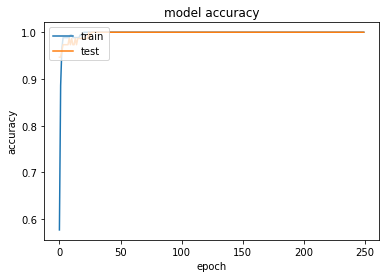

In [160]:
# summarize history for accuracy

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train' , 'test'] , loc = 'upper left')
plt.show()

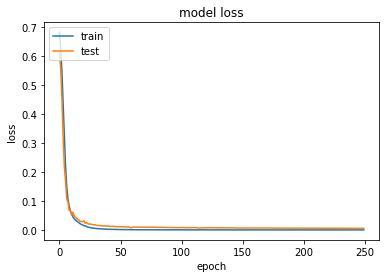

In [161]:
# summarize history for loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train' , 'test'] , loc = 'upper left')
plt.show()

In [162]:
X = scores[1]

In [163]:
accscore.append(X)
model_name.append('ANN')

### Accuracy Comparison

<AxesSubplot:title={'center':' Accuracy Comparision '}, xlabel=' Accuracy ', ylabel=' Algorithm '>

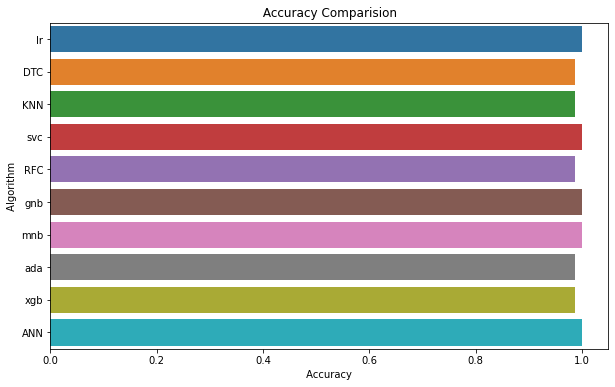

In [166]:
plt.figure(figsize = (10,6))
plt.title(" Accuracy Comparision ")
plt.xlabel(" Accuracy ")
plt.ylabel(" Algorithm ")
sns.barplot(x =  accscore,y = model_name)

In [168]:
accuracy_models = dict(zip(model_name, accscore))
for k, v in accuracy_models.items():
    print (k, '=', v)

lr = 1.0
DTC = 0.9866666666666667
KNN = 0.9866666666666667
svc = 1.0
RFC = 0.9866666666666667
gnb = 1.0
mnb = 1.0
ada = 0.9866666666666667
xgb = 0.9866666666666667
ANN = 1.0


#### Choosing Logistic Regression as final models for hyperparameter tunning it giving highest accuracy.

#### Hyperparameter tunning of Logistic Regression


In [169]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [170]:
from sklearn.model_selection import GridSearchCV
parameter = {'penalty':[ 'l2' , ' elasticnet'], 'C' : [1,2,3,4,5,6,7,8,10,20,50,60,70,80,100],'max_iter' : [100, 200 , 300]}

In [171]:
model = GridSearchCV( LR , param_grid = parameter , scoring = 'accuracy' , cv = 5)
model

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 10, 20, 50, 60, 70, 80,
                               100],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l2', ' elasticnet']},
             scoring='accuracy')

In [172]:
model.fit(x_train , y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 10, 20, 50, 60, 70, 80,
                               100],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l2', ' elasticnet']},
             scoring='accuracy')

In [173]:
print(model.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [174]:
LR = LogisticRegression(penalty = 'l2' , max_iter = 100 , C = 1)
LR.fit(x_train , y_train)
pred_LR = LR.predict(x_test)
print("Accuracy score for Logistic Regression is " , accuracy_score(y_test , pred_LR)*100)


Accuracy score for Logistic Regression is  100.0


In [175]:
print(classification_report(y_test , pred_LR))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        50

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



In [176]:
confusion_matrix(y_test , pred_LR)

array([[25,  0],
       [ 0, 50]], dtype=int64)